## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.461443 -0.786604 -1.548794 -0.643106  0.621204 -0.100694
1  1.015460  0.011755  0.489965 -0.847238 -0.731413  0.130179
2 -0.682792  0.677771 -0.466021  0.563964 -0.503200 -0.054227
3 -1.187445  1.722685  1.546153  0.393878 -1.462633 -0.260082
4 -0.002728 -0.035002 -0.399792 -0.867437 -0.688847 -0.569977


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0013423	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9912155	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9832474	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9727204	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9634691	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9552300	total: 60ms	remaining: 9.93s
6:	learn: 0.9445141	total: 60.5ms	remaining: 8.58s
7:	learn: 0.9356190	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9265623	total: 61.6ms	remaining: 6.78s
9:	learn: 0.9201942	total: 62ms	remaining: 6.14s
10:	learn: 0.9103592	total: 62.5ms	remaining: 5.62s
11:	learn: 0.9028769	total: 67.8ms	remaining: 5.58s
12:	learn: 0.8943710	total: 68.2ms	remaining: 5.18s
13:	learn: 0.8869672	total: 68.6ms	remaining: 4.83s
14:	learn: 0.8804161	total: 69ms	remaining: 4.53s
15:	learn: 0.8726004	total: 69.4ms	remaining: 4.26s
16:	learn: 0.8645674	total: 69.8ms	remaining: 4.04s
17:	learn: 0.8568337	total: 70.3ms	remaining: 3.84s
18:	learn: 0.8503345	total: 70.7ms	remaining: 3.65

106:	learn: 0.4309345	total: 107ms	remaining: 897ms
107:	learn: 0.4276130	total: 108ms	remaining: 892ms
108:	learn: 0.4242566	total: 108ms	remaining: 886ms
109:	learn: 0.4210516	total: 109ms	remaining: 882ms
110:	learn: 0.4182309	total: 110ms	remaining: 878ms
111:	learn: 0.4155504	total: 110ms	remaining: 874ms
112:	learn: 0.4127632	total: 111ms	remaining: 868ms
113:	learn: 0.4095708	total: 111ms	remaining: 863ms
114:	learn: 0.4065192	total: 111ms	remaining: 857ms
115:	learn: 0.4033548	total: 112ms	remaining: 852ms
116:	learn: 0.4003410	total: 112ms	remaining: 848ms
117:	learn: 0.3975807	total: 113ms	remaining: 843ms
118:	learn: 0.3949627	total: 113ms	remaining: 839ms
119:	learn: 0.3929276	total: 114ms	remaining: 835ms
120:	learn: 0.3909994	total: 114ms	remaining: 831ms
121:	learn: 0.3885005	total: 115ms	remaining: 826ms
122:	learn: 0.3856791	total: 115ms	remaining: 822ms
123:	learn: 0.3831674	total: 116ms	remaining: 817ms
124:	learn: 0.3805429	total: 116ms	remaining: 813ms
125:	learn: 

269:	learn: 0.1546535	total: 187ms	remaining: 505ms
270:	learn: 0.1537223	total: 187ms	remaining: 503ms
271:	learn: 0.1528349	total: 187ms	remaining: 502ms
272:	learn: 0.1520311	total: 188ms	remaining: 500ms
273:	learn: 0.1510660	total: 188ms	remaining: 499ms
274:	learn: 0.1501813	total: 189ms	remaining: 497ms
275:	learn: 0.1490209	total: 189ms	remaining: 496ms
276:	learn: 0.1481832	total: 190ms	remaining: 495ms
277:	learn: 0.1472931	total: 190ms	remaining: 494ms
278:	learn: 0.1464091	total: 191ms	remaining: 493ms
279:	learn: 0.1455505	total: 191ms	remaining: 492ms
280:	learn: 0.1448061	total: 192ms	remaining: 490ms
281:	learn: 0.1439955	total: 192ms	remaining: 489ms
282:	learn: 0.1432223	total: 193ms	remaining: 488ms
283:	learn: 0.1424298	total: 193ms	remaining: 487ms
284:	learn: 0.1415387	total: 194ms	remaining: 486ms
285:	learn: 0.1405429	total: 194ms	remaining: 484ms
286:	learn: 0.1397104	total: 194ms	remaining: 483ms
287:	learn: 0.1386221	total: 195ms	remaining: 481ms
288:	learn: 

500:	learn: 0.0487107	total: 290ms	remaining: 289ms
501:	learn: 0.0484444	total: 291ms	remaining: 288ms
502:	learn: 0.0482334	total: 291ms	remaining: 288ms
503:	learn: 0.0480196	total: 292ms	remaining: 287ms
504:	learn: 0.0477970	total: 292ms	remaining: 286ms
505:	learn: 0.0476074	total: 293ms	remaining: 286ms
506:	learn: 0.0474073	total: 293ms	remaining: 285ms
507:	learn: 0.0472514	total: 293ms	remaining: 284ms
508:	learn: 0.0469615	total: 294ms	remaining: 283ms
509:	learn: 0.0468138	total: 294ms	remaining: 283ms
510:	learn: 0.0466675	total: 295ms	remaining: 282ms
511:	learn: 0.0463841	total: 295ms	remaining: 281ms
512:	learn: 0.0462264	total: 296ms	remaining: 281ms
513:	learn: 0.0460357	total: 296ms	remaining: 280ms
514:	learn: 0.0458940	total: 297ms	remaining: 279ms
515:	learn: 0.0457460	total: 297ms	remaining: 279ms
516:	learn: 0.0454352	total: 298ms	remaining: 278ms
517:	learn: 0.0452979	total: 298ms	remaining: 277ms
518:	learn: 0.0451428	total: 299ms	remaining: 277ms
519:	learn: 

666:	learn: 0.0247176	total: 374ms	remaining: 187ms
667:	learn: 0.0246661	total: 374ms	remaining: 186ms
668:	learn: 0.0246259	total: 375ms	remaining: 185ms
669:	learn: 0.0245717	total: 375ms	remaining: 185ms
670:	learn: 0.0245128	total: 376ms	remaining: 184ms
671:	learn: 0.0244032	total: 376ms	remaining: 184ms
672:	learn: 0.0243438	total: 377ms	remaining: 183ms
673:	learn: 0.0242724	total: 377ms	remaining: 182ms
674:	learn: 0.0242309	total: 378ms	remaining: 182ms
675:	learn: 0.0240791	total: 378ms	remaining: 181ms
676:	learn: 0.0240400	total: 379ms	remaining: 181ms
677:	learn: 0.0238792	total: 379ms	remaining: 180ms
678:	learn: 0.0237476	total: 379ms	remaining: 179ms
679:	learn: 0.0237096	total: 380ms	remaining: 179ms
680:	learn: 0.0236403	total: 380ms	remaining: 178ms
681:	learn: 0.0235934	total: 381ms	remaining: 177ms
682:	learn: 0.0234373	total: 381ms	remaining: 177ms
683:	learn: 0.0232846	total: 382ms	remaining: 176ms
684:	learn: 0.0232319	total: 382ms	remaining: 176ms
685:	learn: 

840:	learn: 0.0138798	total: 474ms	remaining: 89.7ms
841:	learn: 0.0138060	total: 475ms	remaining: 89.1ms
842:	learn: 0.0137549	total: 475ms	remaining: 88.5ms
843:	learn: 0.0137142	total: 476ms	remaining: 88ms
844:	learn: 0.0136645	total: 476ms	remaining: 87.4ms
845:	learn: 0.0136358	total: 477ms	remaining: 86.8ms
846:	learn: 0.0136047	total: 477ms	remaining: 86.2ms
847:	learn: 0.0135546	total: 478ms	remaining: 85.7ms
848:	learn: 0.0135263	total: 478ms	remaining: 85.1ms
849:	learn: 0.0134819	total: 479ms	remaining: 84.5ms
850:	learn: 0.0134114	total: 479ms	remaining: 83.9ms
851:	learn: 0.0133633	total: 480ms	remaining: 83.4ms
852:	learn: 0.0133354	total: 480ms	remaining: 82.8ms
853:	learn: 0.0132666	total: 481ms	remaining: 82.2ms
854:	learn: 0.0132199	total: 481ms	remaining: 81.6ms
855:	learn: 0.0131869	total: 482ms	remaining: 81.1ms
856:	learn: 0.0131544	total: 482ms	remaining: 80.5ms
857:	learn: 0.0130891	total: 483ms	remaining: 79.9ms
858:	learn: 0.0130577	total: 483ms	remaining: 79

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

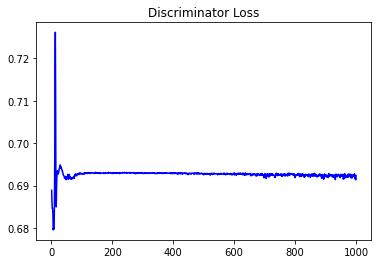

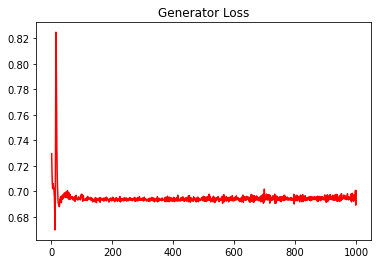

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11362792501705


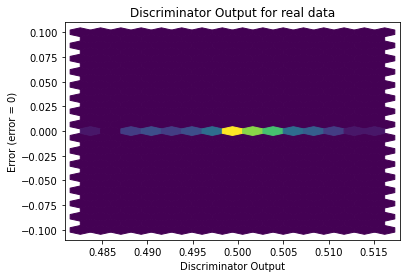

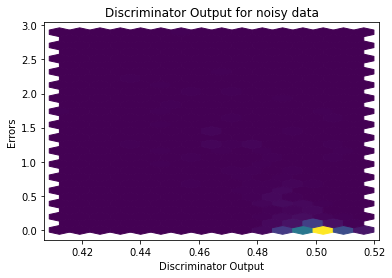

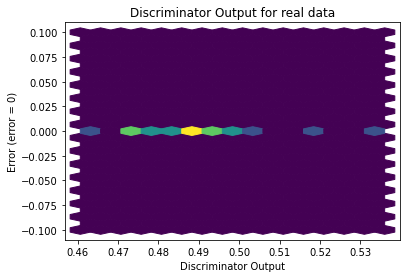

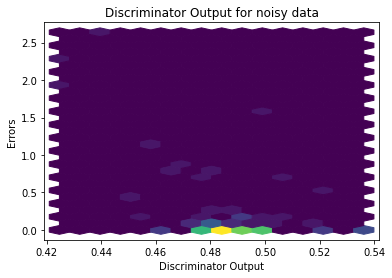

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


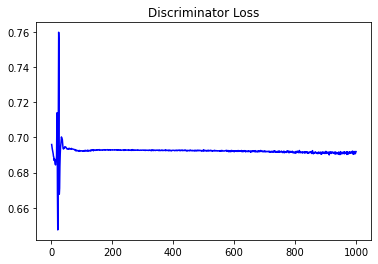

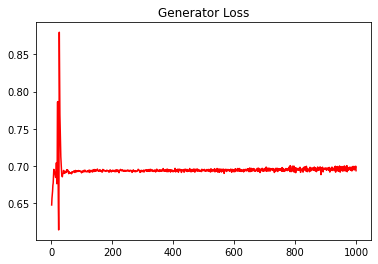

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13990783937977758


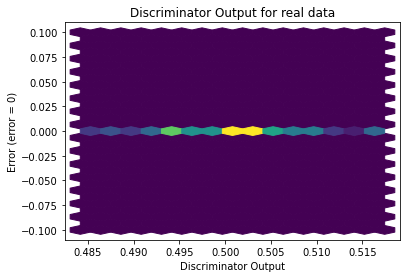

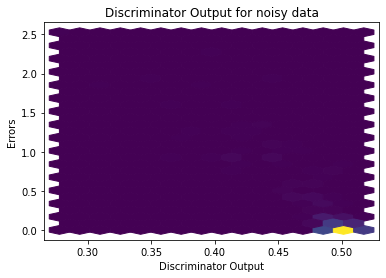

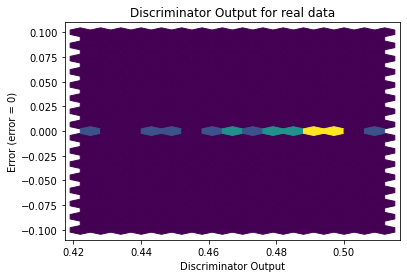

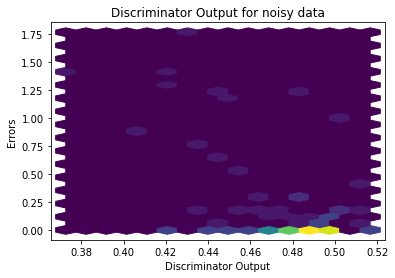

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5264]], requires_grad=True)
